In [3]:
from skimage import draw
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
np.random.seed(42)

In [5]:
arr = np.zeros((750, 1000, 3)) + 1

In [6]:
def add_target(x, y, radius, num_rings, data):
    for i, r in zip(range(num_rings), reversed(range(num_rings))):
        ring_size = (r+1) * (radius/num_rings)
        if (i % 2) != 0:
            ring_color = (1, 1, 1)
        else:
            ring_color = (1, 0, 0)
        rr, cc = draw.disk((x, y), radius=ring_size, shape=data.shape)
        data[rr, cc, :] = ring_color
    return data

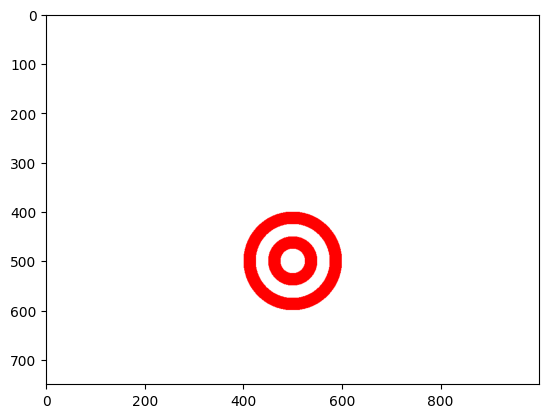

In [7]:
data = add_target(500, 500, 100, 4, arr)
plt.imshow(arr)

In [8]:
def get_new_target_data(x_dim, y_dim, min_radius, max_radius, min_rings, max_rings):
    radius = np.random.uniform(min_radius, max_radius)
        
    num_rings = np.random.uniform(min_rings, max_rings)

    min_x = radius
    max_x = x_dim - radius
    min_y = radius
    max_y = y_dim - radius
    x = np.random.uniform(min_x, max_x)
    y = np.random.uniform(min_y, max_y)
    
    return x, y, num_rings, radius

In [9]:
def circle_intersection(x1, y1, r1, x2, y2, r2):
  
    dist_centers = math.sqrt((x2-x1)**2 + (y2-y1)**2)
    radius_sum = r1 + r2
    
    if dist_centers < radius_sum:
        return True
    return False

In [10]:
def create_scene(x_dim = 1000, y_dim = 1000, 
                 num_targets=4, min_radius=50, max_radius=100, 
                 min_rings=5, max_rings=5, colors=None):
    """
    Creates multiple new targets of varying radius, number of rings, and color
    
    Parameters:
    num_targets - the number of targets
    min_radius - the minimum radius of a target
    max_radius - the maximum radius of a target
    min_rings - the minimum number of rings on a target
    max_rings - the maximum number of rings on a target
    """
    scene_arr = np.zeros((x_dim, y_dim, 3)) + 1
    targets_metadata = []
    
    for n in range(num_targets):
        x, y, num_rings, radius = get_new_target_data(x_dim, y_dim, min_radius, max_radius, min_rings, max_rings)
        
        # Check for overlap with existing targets and redo target if it there is overlap        
        while True:
            is_overlapping = False
            
            # Check for overlap with existing targets
            for t in targets_metadata:
                targets_intersect = circle_intersection(t[0], t[1], t[2], x, y, radius)
                if targets_intersect:
                    is_overlapping = True
            
            # If there is overlap, redo the target and check again. If not, break and continue with rest of target creation
            if is_overlapping:
                x, y, num_rings, radius = get_new_target_data(x_dim, y_dim, min_radius, max_radius, min_rings, max_rings)    
            else:
                break
                
        scene_arr = add_target(x, y, radius=radius, num_rings=int(num_rings), data=scene_arr)
        targets_metadata.append((x, y, radius))
        
    return scene_arr, targets_metadata

In [26]:
arr, metadata = create_scene(x_dim=100, y_dim=100, num_targets=5, min_radius=10, max_radius=20)

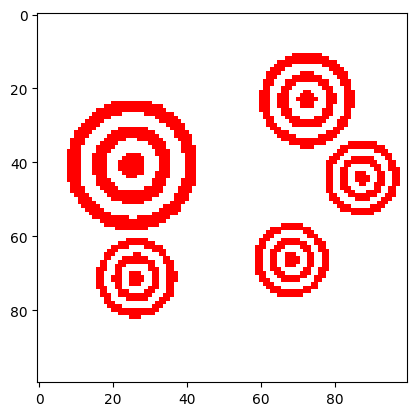

In [27]:
plt.imshow(arr)

In [12]:
arr, metadata = create_scene()

In [13]:
metadata

[(590.4192530040422, 222.99034224018607, 79.62072844310212),
 (916.0398192174559, 775.5514394280739, 53.25257964926398),
 (660.1977321997326, 447.96028181140184, 65.23068845866854),
 (86.63190930435313, 863.3930879353389, 56.10191174223894)]

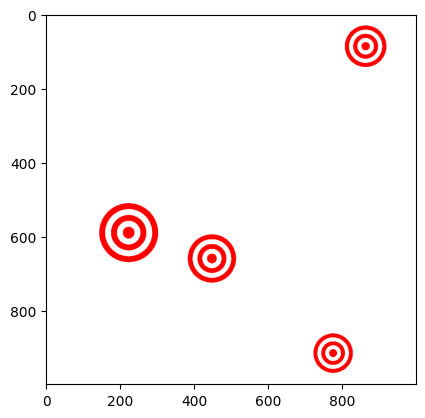

In [14]:
plt.imshow(arr)

In [15]:
def delete_target(x, y, radius, data):
    rr, cc = draw.disk((x, y), radius=radius, shape=data.shape)
    data[rr, cc, :] = (1, 1, 1)
    return data

In [16]:
arr = delete_target(metadata[0][0], metadata[0][1], metadata[0][2], arr)
metadata.remove(metadata[0])

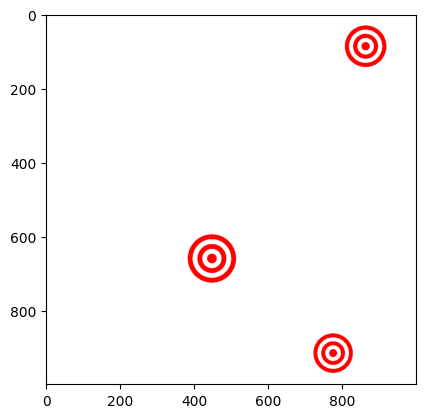

In [17]:
plt.imshow(arr)

In [18]:
metadata

[(916.0398192174559, 775.5514394280739, 53.25257964926398),
 (660.1977321997326, 447.96028181140184, 65.23068845866854),
 (86.63190930435313, 863.3930879353389, 56.10191174223894)]

In [19]:
action = (194, 241)

In [20]:
def step(action, metadata, arr):
    for i, m in enumerate(metadata):
        x, y, radius = m
        dist = math.sqrt((action[0] - x)**2 + (action[1] - y)**2)
        reward = 1 - (dist/radius)
        if dist < radius:
            biggest_target_idx = np.argmax([m[2] for m in metadata])
            if i == biggest_target_idx:
                reward *= 3
            arr = delete_target(x, y, radius, arr)
            metadata.remove(m)
            return reward
    return -1
step(action, metadata, arr)

-1

In [21]:
step((0,0), metadata, arr)

-1

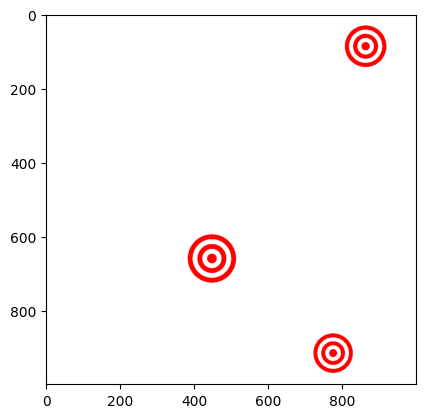

In [22]:
plt.imshow(arr)

In [23]:
metadata

[(916.0398192174559, 775.5514394280739, 53.25257964926398),
 (660.1977321997326, 447.96028181140184, 65.23068845866854),
 (86.63190930435313, 863.3930879353389, 56.10191174223894)]